In [3]:
###Import thư viện

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## 1. Nhập dữ liệu

In [7]:
df = pd.read_csv('data_iris.csv')
df

,sepallength,sepalwidth,petallength,petalwidth,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


***
### Tách giữ liệu và phân loại dữ liệu

In [8]:
# X1 = df[["sepallength","sepalwidth","petallength","petalwidth"]]

X = np.array(df.iloc[:,0:4]) #get column sepallength 	sepalwidth 	petallength 	petalwidth

# Y = np.array(df.name) # get column name

Y = df['name']

Y1 = df['name']
# y2 = pd.Categorical(df['name']).codes

In [9]:
df['name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
Y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: name, dtype: int64

***
#### Chuyển nhãn hoa sang số nguyên

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# chuyển đổi name hoa sang số nguyên
Y = le.fit_transform(Y)

# Y1 = le.transform(Y1)

In [12]:
# kết quả sau khi chuyển nhãn hoa sang số nguyên
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Petal')

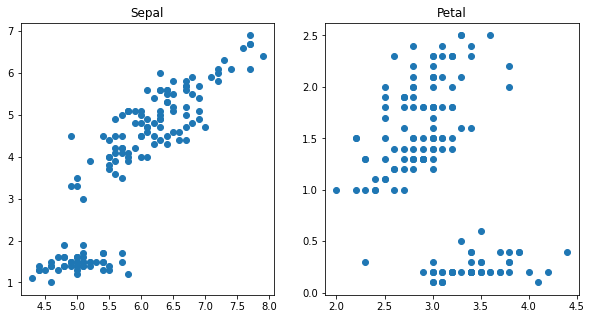

In [13]:
fig, ((ax1,ax2)) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(10,5))

ax1.scatter(X[:,0:1],X[:,2:3])

ax2.scatter(X[:,1:2],X[:,3:4]);

ax1.set_title('Sepal')

ax2.set_title('Petal')

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=0)

***
## 2. Cho thuật toán train

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state= 0)
kmeans.fit(X_train)

res = pd.Series(kmeans.labels_)

print('Tìm centers: ')
print(kmeans.cluster_centers_)

# print(kmeans.labels_)

pred_label = kmeans.predict(X_train)

res = pd.Series(pred_label)
print(pred_label)

Tìm centers: 
[[6.909375   3.1        5.728125   2.0625    ]
 [4.99411765 3.38235294 1.45294118 0.22941176]
 [5.84358974 2.70512821 4.34102564 1.41025641]]
[2 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 1 2 2 2 2 2 0 1 1 0 2 1 1 0 1 2 2 1 2 0 2
 1 0 0 0 0 1 1 0 0 1 0 1 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 2 1 1 2 1 0 2 0 2 1
 2 1 0 1 1 0 1 0 2 2 2 0 0 2 0 1 2 0 2 1 2 2 2 2 1 1 1 0 2 0 1]


****
## Test với 1 điểm dữ liệu trong tập test

In [16]:
print('Điểm dữ liệu test trong tập test:',X_test[1:2])

print('Kết quả dự đoán:',kmeans.predict(X_test[1:2]))

Điểm dữ liệu test trong tập test: [[6.  2.2 4.  1. ]]
Kết quả dự đoán: [2]


In [17]:
for i in range(3):
    print([i],Y1[:105][res==i].value_counts())

[0] Iris-setosa        17
Iris-versicolor    13
Iris-virginica      2
Name: name, dtype: int64
[1] Iris-versicolor    20
Iris-setosa        12
Iris-virginica      2
Name: name, dtype: int64
[2] Iris-setosa        21
Iris-versicolor    17
Iris-virginica      1
Name: name, dtype: int64


In [18]:
learnedLabel = ['Iris-setosa','Iris-versicolor','Iris-setosa']

In [19]:
predCluster = kmeans.predict(X_test)[0]

print("Cluster {}: '{}'".format(predCluster, learnedLabel[predCluster]))

Cluster 2: 'Iris-setosa'


In [20]:
Y1[:105]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
100    Iris-virginica
101    Iris-virginica
102    Iris-virginica
103    Iris-virginica
104    Iris-virginica
Name: name, Length: 105, dtype: object

In [21]:
count = sum([res==0])
print([res==0])

[0      False
1       True
2       True
3      False
4       True
       ...  
100    False
101     True
102    False
103     True
104    False
Length: 105, dtype: bool]


***
## Test với tập data test

In [22]:
pred = kmeans.predict(X_test)
print(pred)

[2 2 1 0 1 0 1 2 2 2 0 2 2 2 2 1 2 2 1 1 2 2 1 1 2 1 1 2 2 1 0 2 1 2 0 2 1
 2 2 2 0 1 0 1 1]


In [23]:
CorrectLabels = sum(Y_train == pred_label)

print('Số điểm dự đoán chính xác:',CorrectLabels)

Số điểm dự đoán chính xác: 10


***
### Test độ chính xác của thực toán

In [24]:
correct_labels = sum(Y_train == pred_label)

print("Kết quả: %d so với %d mẫu đã được đánh nhãn chính xác" % (correct_labels, Y_train.size))

Kết quả: 10 so với 105 mẫu đã được đánh nhãn chính xác


In [25]:
print('Độ chính xác: {0:0.2f}'. format(correct_labels/float(Y_train.size)))

Độ chính xác: 0.10


***
## Vẽ đồ thị biểu diễn

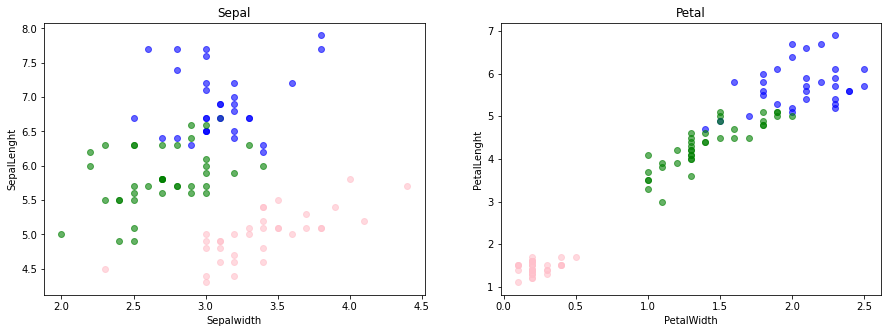

In [26]:

fig,((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in range(len(X_train)):
    if pred_label[i] == 0: color = 'blue'
    elif pred_label[i] == 1: color = 'pink'
    elif pred_label[i] == 2: color = 'green'

    ax1.scatter(X_train[:, 1:2][i], X_train[:, 0:1][i], c=color, alpha=0.6)
    ax2.scatter(X_train[:, 3:4][i], X_train[:, 2:3][i], c=color, alpha=0.6)
#     plt.scatter(kmeans.cluster_centers_[:, 0:1], kmeans.cluster_centers_[:, 1:2], c='red', marker='^')
#     plt.scatter([4], [5], c='purple', marker='s')

ax1.set_title('Sepal')
ax2.set_title('Petal')

ax1.set_xlabel('Sepalwidth')
ax1.set_ylabel('SepalLenght')

ax2.set_xlabel('PetalWidth')
ax2.set_ylabel('PetalLenght')

plt.show()